In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn para transformacao e regressão
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# statsmodels para regressão
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [370]:
satisfacao = pd.read_excel('Dados_Satisfacao.xlsx')

In [371]:
satisfacao.head(200)

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,43667,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,43667,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,43667,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,43667,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,43667,5,SIM,NÃO,NÃO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...
195,Banco Bradesco,muito bom... da pra fazer transferencia recarg...,43674,5,SIM,NÃO,NÃO,NÃO,NÃO
196,Banco Bradesco,cinco estrela e pouco,43674,5,SIM,NÃO,NÃO,NÃO,NÃO
197,Banco Bradesco,pesimo,43674,1,NÃO,SIM,NÃO,NÃO,NÃO
198,Banco Bradesco,super prático e fácil de manusear,43674,5,SIM,NÃO,NÃO,NÃO,NÃO


In [372]:
# verificar se existe valores deferentes de sim e não nas colunas que recebem esse valor
print(satisfacao['Elogio quanto ao app'].unique())
print(satisfacao['Reclamação a Instituição'].unique())
print(satisfacao['Reclamação quanto ao app'] .unique())
print(satisfacao['Não Classificável'].unique())



['SIM' 'NÃO' 'NAO']
['NÃO' 'SIM']
['NÃO' 'SIM']
['NÃO' 'SIM']


In [373]:
satisfacao['Elogio quanto ao app'] = satisfacao['Elogio quanto ao app'].str.replace('NÃO', 'NAO')


In [374]:
satisfacao.shape

(8702, 9)

In [375]:
satisfacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instituição               8702 non-null   object
 1   Comentario                8698 non-null   object
 2   Data                      8702 non-null   int64 
 3   Classificação             8702 non-null   int64 
 4   Elogio quanto ao app      8702 non-null   object
 5   Reclamação quanto ao app  8702 non-null   object
 6   Elogio a Instituição      8702 non-null   object
 7   Reclamação a Instituição  8702 non-null   object
 8   Não Classificável         8702 non-null   object
dtypes: int64(2), object(7)
memory usage: 612.0+ KB


In [376]:
# construir um modelo de regressão logística para prever a satisfação do cliente
# a partir das variáveis disponíveis no dataset.

# 1. Tratamento dos dados
# 1.1. Verificar se há dados faltantes
satisfacao.isnull().sum()

Instituição                 0
Comentario                  4
Data                        0
Classificação               0
Elogio quanto ao app        0
Reclamação quanto ao app    0
Elogio a Instituição        0
Reclamação a Instituição    0
Não Classificável           0
dtype: int64

In [377]:
# 1.2. Verificar se há dados duplicados
satisfacao.duplicated().sum()
# São dados que as respostas são iguais, mas os clientes são diferentes

620

In [378]:
# Colocar uma valor padrão para os dados faltantes
satisfacao.Comentario.fillna('Não Informado', inplace=True)


In [379]:
satisfacao.isnull().sum()

Instituição                 0
Comentario                  0
Data                        0
Classificação               0
Elogio quanto ao app        0
Reclamação quanto ao app    0
Elogio a Instituição        0
Reclamação a Instituição    0
Não Classificável           0
dtype: int64

In [380]:
# 2. Análise Exploratória
# 2.1. Verificar a distribuição das variáveis
satisfacao.describe()

,Data,Classificação
count,8702.000000,8702.000000
mean,43866.945760,4.158584
std,117.149061,1.439392
min,43667.000000,1.000000
25%,43765.000000,4.000000
50%,43870.000000,5.000000
75%,43968.000000,5.000000
max,44067.000000,5.000000


In [381]:
# 2.2. Verificar a distribuição das variáveis categóricas
satisfacao.describe(include='O')

,Instituição,Comentario,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
count,8702,8702,8702,8702,8702,8702,8702
unique,5,5877,2,2,2,2,2
top,Banco Bradesco,Muito bom,SIM,NÃO,NÃO,NÃO,NÃO
freq,1741,511,6291,6789,8301,8258,8397


In [382]:
# 2.3. Verificar a distribuição da variável target
satisfacao.Classificação.value_counts()


5    5961
1    1175
4     837
3     402
2     327
Name: Classificação, dtype: int64

In [383]:
# 3. Preparação dos dados
# 3.1. Transformar as variáveis categóricas em numéricas
# 3.2 dropar as variáveis que não serão utilizadas
satisfacao.drop(['Comentario'], axis=1, inplace=True)


In [384]:
satisfacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instituição               8702 non-null   object
 1   Data                      8702 non-null   int64 
 2   Classificação             8702 non-null   int64 
 3   Elogio quanto ao app      8702 non-null   object
 4   Reclamação quanto ao app  8702 non-null   object
 5   Elogio a Instituição      8702 non-null   object
 6   Reclamação a Instituição  8702 non-null   object
 7   Não Classificável         8702 non-null   object
dtypes: int64(2), object(6)
memory usage: 544.0+ KB


In [385]:
# 3.3. Transformar as variaveis com LabelEncoder
le = LabelEncoder()
satisfacao['Elogio quanto ao app'] = le.fit_transform(satisfacao['Elogio quanto ao app'])
satisfacao['Elogio a Instituição'] = le.fit_transform(satisfacao['Elogio a Instituição'])
satisfacao['Reclamação quanto ao app'] = le.fit_transform(satisfacao['Reclamação quanto ao app'])
satisfacao['Reclamação a Instituição'] = le.fit_transform(satisfacao['Reclamação a Instituição'])
satisfacao['Não Classificável'] = le.fit_transform(satisfacao['Não Classificável'])
# satisfacao['Instituição'] = le.fit_transform(satisfacao['Instituição'])
# transformar Institucao com get_dummies
#satisfacao = pd.get_dummies(satisfacao, columns=['Instituição'])

In [386]:
satisfacao["Classificação"] = satisfacao["Classificação"].replace(1,-1)
satisfacao["Classificação"] = satisfacao["Classificação"].replace(2,-1)
satisfacao["Classificação"] = satisfacao["Classificação"].replace(3,0)
satisfacao["Classificação"] = satisfacao["Classificação"].replace(4,1)
satisfacao["Classificação"] = satisfacao["Classificação"].replace(5,1)

In [387]:
satisfacao.describe()

,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
count,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000
mean,43866.945760,0.608596,0.722937,0.219835,0.046081,0.051023,0.035049
std,117.149061,0.763860,0.447573,0.414158,0.209673,0.220057,0.183915
min,43667.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43765.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43870.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,43968.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,44067.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [388]:
satisfacao.T

,0,1,2,3,4,5,6,7,8,9,...,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701
Instituição,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,Banco do Brasil,...,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal,Caixa Econômica Federal
Data,43667,43667,43667,43667,43667,43667,43667,43667,43667,43667,...,44067,44067,44067,44067,44067,44067,44067,44067,44067,44067
Classificação,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,-1,1
Elogio quanto ao app,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
Reclamação quanto ao app,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
Elogio a Instituição,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Reclamação a Instituição,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Não Classificável,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [389]:
# Etapa 01: Analisar NPS de classificação de cada instituição
#NPS = (Número de Promotores - Número de Detratores) / Número de Respondentes) * 100
satisfacao_banco = satisfacao.groupby(["Instituição"])["Classificação"].agg("mean").sort_values().reset_index()
satisfacao_banco['Classificação'] = satisfacao_banco['Classificação']*100
print(satisfacao_banco)



               Instituição  Classificação
0  Caixa Econômica Federal      42.413793
1               Banco Itau      56.954023
2                   Nubank      58.529581
3           Banco Bradesco      68.236646
4          Banco do Brasil      78.160920


In [390]:
satisfacao[satisfacao['Instituição'] == 'Nubank']['Classificação'].value_counts(normalize = True) * 100

 1    77.139575
-1    18.609994
 0     4.250431
Name: Classificação, dtype: float64

In [391]:
#Etapa 02: Calcular a % de elogios do app para cada instituição
#Elogio quanto ao app

satisfacao_banco = satisfacao.groupby(["Instituição"])["Elogio quanto ao app"].agg("mean").sort_values().reset_index()
satisfacao_banco['Elogio quanto ao app'] = satisfacao_banco['Elogio quanto ao app']*100

print(satisfacao_banco)



               Instituição  Elogio quanto ao app
0                   Nubank             63.009765
1  Caixa Econômica Federal             63.505747
2               Banco Itau             72.816092
3           Banco Bradesco             77.886272
4          Banco do Brasil             84.252874


In [392]:
# Etapa 03: Calcular a % de reclamações do app para cada instituição
#Reclamação quanto ao app

satisfacao_banco = satisfacao.groupby(["Instituição"])["Reclamação quanto ao app"].agg("mean").sort_values().reset_index()
satisfacao_banco['Reclamação quanto ao app'] = satisfacao_banco['Reclamação quanto ao app']*100

print(satisfacao_banco)

               Instituição  Reclamação quanto ao app
0          Banco do Brasil                 13.620690
1                   Nubank                 17.748420
2           Banco Bradesco                 19.356692
3               Banco Itau                 25.402299
4  Caixa Econômica Federal                 33.793103


In [393]:
# Etapa 04: Calcular a % de elogios a instituição para cada instituição
#Elogio a Instituição

satisfacao_banco = satisfacao.groupby(["Instituição"])["Elogio a Instituição"].agg("mean").sort_values().reset_index()
satisfacao_banco['Elogio a Instituição'] = satisfacao_banco['Elogio a Instituição']*100

print(satisfacao_banco)


               Instituição  Elogio a Instituição
0  Caixa Econômica Federal              0.747126
1           Banco Bradesco              2.067777
2          Banco do Brasil              2.068966
3               Banco Itau              2.643678
4                   Nubank             15.508329


In [394]:
# Etapa 05: Calcular a % de reclamação a instituição para cada instituição
#Reclamação a Instituição

satisfacao_banco = satisfacao.groupby(["Instituição"])["Reclamação a Instituição"].agg("mean").sort_values().reset_index()
satisfacao_banco['Reclamação a Instituição'] = satisfacao_banco['Reclamação a Instituição']*100

print(satisfacao_banco)


               Instituição  Reclamação a Instituição
0  Caixa Econômica Federal                  2.126437
1           Banco Bradesco                  2.354968
2          Banco do Brasil                  2.471264
3               Banco Itau                  3.678161
4                   Nubank                 14.876508


<AxesSubplot:xlabel='Data', ylabel='Classificação'>

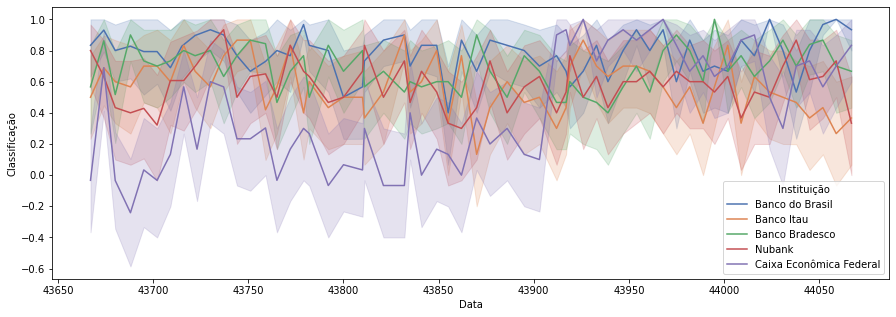

In [395]:
# Etapa 06: Plote um gráfico de linhas para entender a tendência das classificações por instituição
tendencia_group = satisfacao.groupby(["Instituição", "Data"])["Classificação"].agg("mean").sort_values().reset_index()
plt.subplots(figsize=(15, 5))
sns.set_palette("deep")
sns.lineplot(x="Data", y="Classificação", data=satisfacao, hue="Instituição")